In [16]:
import pandas as pd

df = pd.read_csv('/Users/Ihor/goit-ds-hws/bestsellers with categories.csv')

In [17]:
df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [18]:
df.shape


(550, 7)

In [19]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [20]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [21]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

<Axes: ylabel='Frequency'>

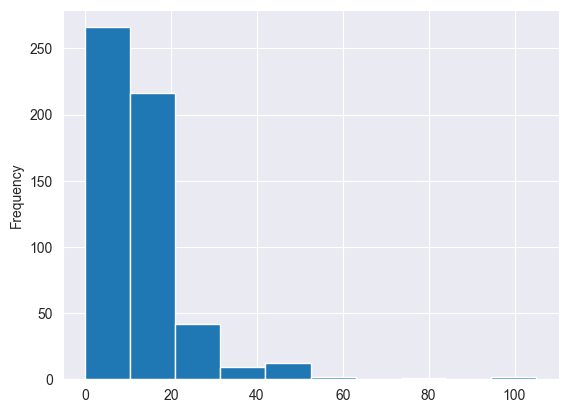

In [22]:
df['price'].plot(kind='hist')

In [23]:

print('Максимальна ціна: ', df['price'].max())
print('Мінімальна ціна: ', df['price'].min())
print('Середня ціна: ', df['price'].mean())
print('Медіанна ціна: ', df['price'].median())

Максимальна ціна:  105
Мінімальна ціна:  0
Середня ціна:  13.1
Медіанна ціна:  11.0


In [24]:

print("Найвищий рейтинг у датасеті: ", df['user_rating'].max())

Найвищий рейтинг у датасеті:  4.9


In [25]:
df[df['user_rating'] == df['user_rating'].max()].shape[0]

52

In [26]:
df.loc[df['reviews']==df['reviews'].max(), 'name']

534    Where the Crawdads Sing
Name: name, dtype: object

In [27]:
abc=df[df['year']==2015]
abc.loc[abc['price'].idxmax()]['name']

'Publication Manual of the American Psychological Association, 6th Edition'

In [28]:
df[(df['genre']=='Fiction') & (df['year']==2010)].sort_values(by='price', ascending=False)[:50].shape[0]


20

In [29]:
df.loc[(df['user_rating']==4.9) & (df['year'].isin([2010, 2011]))].shape[0]

1

In [30]:
sorteddf=df[(df['year']==2015) & (df['price']<8)].sort_values(by='price')
sorteddf.loc[sorteddf.index[-1], 'name']

'Old School (Diary of a Wimpy Kid #10)'

In [31]:
df[['genre', 'price']].groupby('genre').agg(['min', 'max'])

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [32]:

newdf = df[['name', 'author']].groupby('author').agg('count')
newdf

,name
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [33]:
newdf.shape

(248, 1)

In [34]:

newdf[newdf['name'] == newdf['name'].max()]

,name
author,
Jeff Kinney,12


In [35]:
moredf = df[['user_rating', 'author']].groupby('author').agg('mean')
moredf

,user_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


In [36]:
moredf[moredf['user_rating']==moredf['user_rating'].min()]

,user_rating
author,
Donna Tartt,3.9


In [37]:

result = pd.concat([newdf, moredf], axis=1)
result.columns = ['count', 'average_rating']
result
result.iloc[0]

count             2.0
average_rating    4.6
Name: Abraham Verghese, dtype: float64